In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import pandas_datareader as data
#import datetime as dt
import yfinance as yf

In [11]:
pip install pandas-datareader

In [13]:
start = '2011-01-01'
end = '2023-12-31'

df = data.DataReader('AAPL','yahoo', start, end)
df

AttributeError: 'NoneType' object has no attribute 'group'

In [14]:
!pip install pandas-datareader yfinance
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd

start = '2011-01-01'
end = '2023-12-31'

# Use yfinance to fetch data as pandas_datareader might have issues with Yahoo Finance
df = yf.download('AAPL', start=start, end=end)

# If you still want to use pandas_datareader, try this (might not work due to Yahoo Finance changes):
# df = web.DataReader('AAPL', 'yahoo', start, end)

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,11.630000,11.795000,11.601429,11.770357,9.951280,445138400
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.003213,309080800
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.085044,255519600
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.076887,300428800
2011-01-07,11.928214,12.012500,11.853571,12.004286,10.149056,311931200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [15]:
df = df.reset_index()
df



,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,11.630000,11.795000,11.601429,11.770357,9.951280,445138400
1,2011-01-04,11.872857,11.875000,11.719643,11.831786,10.003213,309080800
2,2011-01-05,11.769643,11.940714,11.767857,11.928571,10.085044,255519600
3,2011-01-06,11.954286,11.973214,11.889286,11.918929,10.076887,300428800
4,2011-01-07,11.928214,12.012500,11.853571,12.004286,10.149056,311931200
...,...,...,...,...,...,...,...
3265,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
3266,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
3267,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
3268,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900


In [16]:
df = df.drop(['Adj Close', 'Date'], axis=1)
df

,Open,High,Low,Close,Volume
0,11.630000,11.795000,11.601429,11.770357,445138400
1,11.872857,11.875000,11.719643,11.831786,309080800
2,11.769643,11.940714,11.767857,11.928571,255519600
3,11.954286,11.973214,11.889286,11.918929,300428800
4,11.928214,12.012500,11.853571,12.004286,311931200
...,...,...,...,...,...
3265,195.179993,195.410004,192.970001,193.600006,37122800
3266,193.610001,193.889999,192.830002,193.050003,28919300
3267,192.490005,193.500000,191.089996,193.149994,48087700
3268,194.139999,194.660004,193.169998,193.580002,34049900


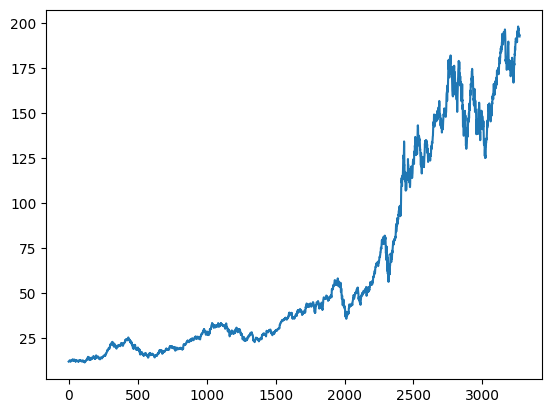

In [17]:
plt.plot(df.Close)

In [20]:
movngavg100 = df.Close.rolling(100).mean()
movngavg100


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3265    181.768301
3266    181.787101
3267    181.898701
3268    182.046001
3269    182.173301
Name: Close, Length: 3270, dtype: float64

<Axes: >

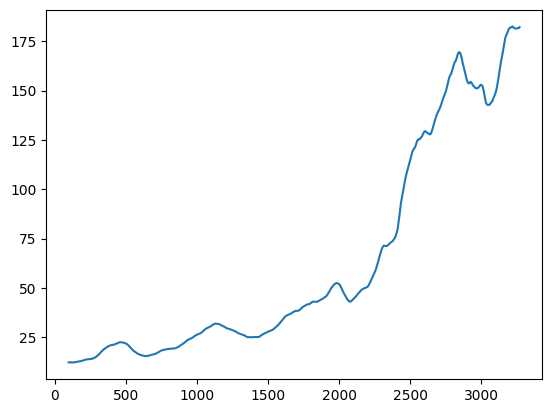

In [21]:
movngavg100.plot()

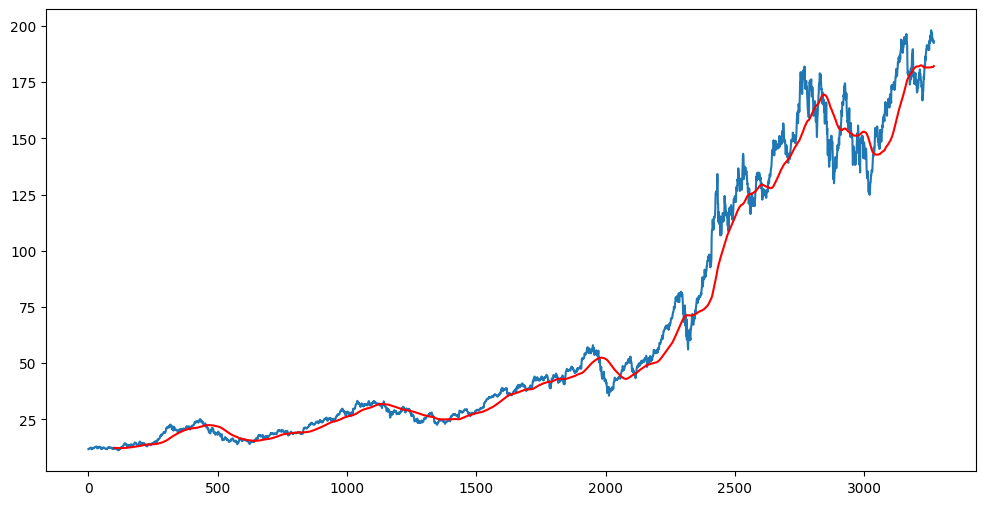

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(movngavg100, 'red')

In [23]:
movngavg200 = df.Close.rolling(200).mean()
movngavg200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3265    178.649100
3266    178.871851
3267    179.085250
3268    179.290201
3269    179.487900
Name: Close, Length: 3270, dtype: float64

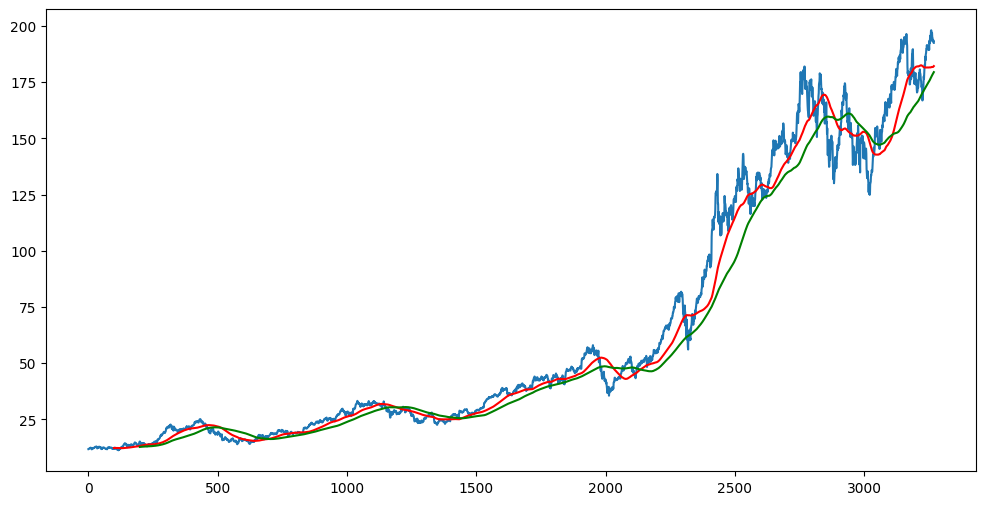

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(movngavg100, 'red')
plt.plot(movngavg200, 'green')

In [26]:
# train and test split

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2289, 1)
(981, 1)


In [27]:
data_training

,Close
0,11.770357
1,11.831786
2,11.928571
3,11.918929
4,12.004286
...,...
2284,77.377502
2285,77.165001
2286,79.712502
2287,80.362503


In [28]:
data_testing

,Close
2289,80.007500
2290,80.387497
2291,79.902496
2292,81.800003
2293,81.217499
...,...
3265,193.600006
3266,193.050003
3267,193.149994
3268,193.580002


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00726614],
       [0.00814318],
       [0.00952501],
       ...,
       [0.97729909],
       [0.98657938],
       [1.        ]])

In [36]:
data_training_array.shape

(2289, 1)

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape

(2189, 100, 1)

In [32]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
69/69 [==============================] - 24s 259ms/step - loss: 0.0175
Epoch 2/50
69/69 [==============================] - 20s 286ms/step - loss: 0.0046
Epoch 3/50
69/69 [==============================] - 20s 295ms/step - loss: 0.0033
Epoch 4/50
69/69 [==============================] - 19s 276ms/step - loss: 0.0037
Epoch 5/50
69/69 [==============================] - 18s 265ms/step - loss: 0.0032
Epoch 6/50
69/69 [==============================] - 19s 269ms/step - loss: 0.0025
Epoch 7/50
69/69 [==============================] - 20s 290ms/step - loss: 0.0031
Epoch 8/50
69/69 [==============================] - 18s 264ms/step - loss: 0.0034
Epoch 9/50
69/69 [==============================] - 18s 263ms/step - loss: 0.0026
Epoch 10/50
69/69 [==============================] - 21s 301ms/step - loss: 0.0024
Epoch 11/50
69/69 [==============================] - 18s 262ms/step - loss: 0.0023
Epoch 12/50
69/69 [==============================] - 19s 282ms/step - loss: 0.0024
Epoch 13/50
6

In [38]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
past100dios = data_training.tail(100)
past100dios

,Close
2189,54.974998
2190,55.174999
2191,55.692501
2192,55.240002
2193,54.432499
...,...
2284,77.377502
2285,77.165001
2286,79.712502
2287,80.362503


In [45]:

# Use the concat function to combine DataFrames
finaldf = pd.concat([past100dios, data_testing], ignore_index=True)
finaldf

,Close
0,54.974998
1,55.174999
2,55.692501
3,55.240002
4,54.432499
...,...
1076,193.600006
1077,193.050003
1078,193.149994
1079,193.580002


In [46]:
inputdata = scaler.fit_transform(finaldf)
inputdata

array([[0.00386248],
       [0.00525437],
       [0.00885589],
       ...,
       [0.9654812 ],
       [0.96847381],
       [0.96116639]])

In [47]:
inputdata.shape

(1081, 1)

In [48]:
x_test = []
y_test = []

for i in range(100, inputdata.shape[0]):
    x_test.append(inputdata[i-100: i])
    y_test.append(inputdata[i, 0])


x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(981, 100, 1)
(981,)


In [49]:
y_predicted = model.predict(x_test)

y_predicted.shape

31/31 [==============================] - 4s 126ms/step


(981, 1)

In [50]:
y_test

array([0.17807433, 0.1807189 , 0.17734357, 0.19054913, 0.18649523,
       0.18663445, 0.17628228, 0.18432041, 0.17854408, 0.16593012,
       0.14005846, 0.12248589, 0.13043705, 0.09715359, 0.0968752 ,
       0.14115457, 0.12464335, 0.1479922 , 0.13090685, 0.12413878,
       0.08436568, 0.1177187 , 0.10047672, 0.05315262, 0.10489597,
       0.04267871, 0.06120817, 0.05043845, 0.04715012, 0.02011276,
       0.01163964, 0.05080383, 0.04843763, 0.07091657, 0.05230011,
       0.06460088, 0.06369615, 0.04041689, 0.04741109, 0.04128682,
       0.07792819, 0.07263901, 0.08419169, 0.08753218, 0.09668384,
       0.12069384, 0.11613543, 0.12006752, 0.11329945, 0.1030865 ,
       0.08819334, 0.10164245, 0.09978079, 0.11359525, 0.11394325,
       0.10595726, 0.12187699, 0.13243788, 0.12420839, 0.1313244 ,
       0.13897975, 0.14432113, 0.14973206, 0.16084976, 0.16934027,
       0.16307678, 0.1565349 , 0.15982326, 0.15663929, 0.16925325,
       0.16608675, 0.17668247, 0.1725416 , 0.17609093, 0.17233

In [51]:
y_predicted

array([[0.2277735 ],
       [0.2277916 ],
       [0.22808175],
       [0.22858463],
       [0.22932296],
       [0.23026292],
       [0.23133992],
       [0.23238637],
       [0.23331277],
       [0.23401907],
       [0.23430678],
       [0.23391128],
       [0.23252201],
       [0.2300824 ],
       [0.22653994],
       [0.22198357],
       [0.21691221],
       [0.21170041],
       [0.20693934],
       [0.20287496],
       [0.19953199],
       [0.19649808],
       [0.19372827],
       [0.19107765],
       [0.18809658],
       [0.18493147],
       [0.18130513],
       [0.17722102],
       [0.17272073],
       [0.16790406],
       [0.16272837],
       [0.15718584],
       [0.15168042],
       [0.14653218],
       [0.14218798],
       [0.1386891 ],
       [0.13612348],
       [0.13446806],
       [0.13339198],
       [0.13268293],
       [0.1321257 ],
       [0.1319365 ],
       [0.13220686],
       [0.13306269],
       [0.1345374 ],
       [0.13665591],
       [0.13957652],
       [0.143

In [52]:
scaler.scale_

array([0.00695943])

In [53]:
scale_factor = 1/0.00695943
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

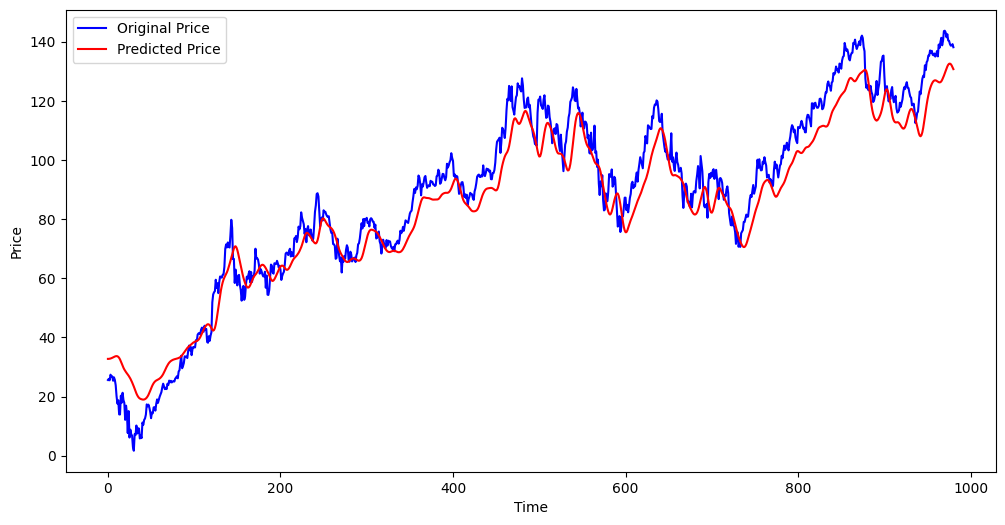

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [59]:
%%writefile app.py

Writing app.py


In [60]:
! wget -q -O - ipv4.icanhazip.com

34.168.14.121


In [65]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.168.14.121:8501

your url is: https://plenty-sheep-write.loca.lt
2024-07-22 15:31:15.518568: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 15:31:15.518627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 15:31:15.520259: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 15:31:17.563266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[****************